## **Load Required Modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import seaborn as sns

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Model,Input
from tensorflow.keras.layers import Dense,Flatten

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau

from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2,EfficientNetB0,EfficientNetB4,Xception

import warnings
import glob
warnings.filterwarnings("ignore")

## **MetaData Load**

In [2]:
train = pd.read_csv("../input/insat3d-infrared-raw-cyclone-images-20132021/insat_3d_ds - Sheet.csv")

# **Image Visualization**

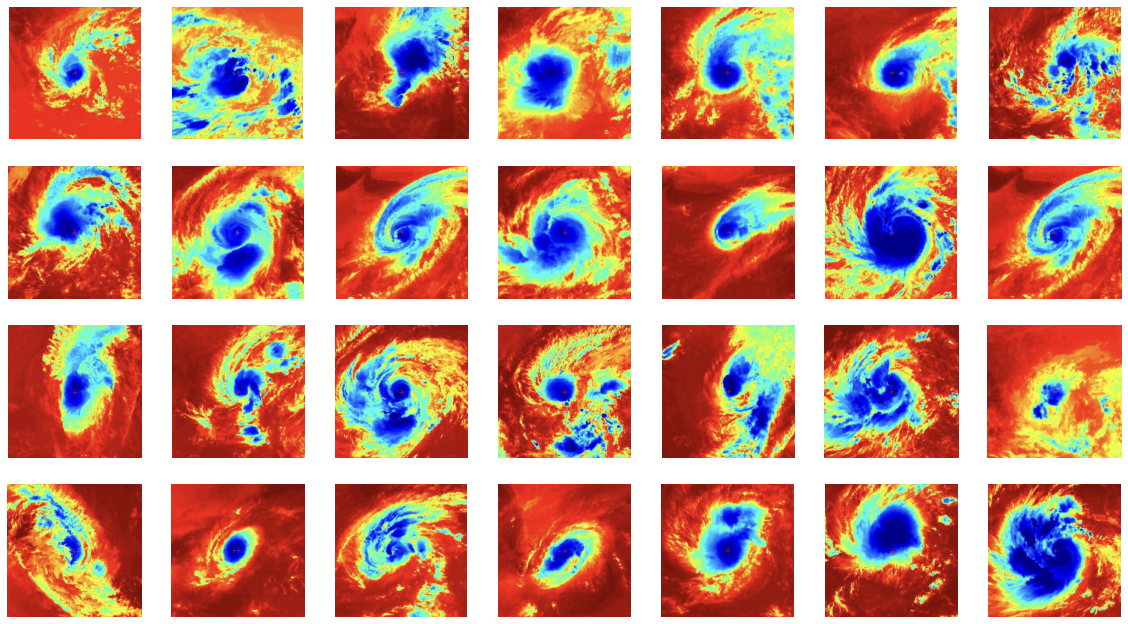

In [3]:
paths = glob.glob("../input/insat3d-infrared-raw-cyclone-images-20132021/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED/*.jpg")
plt.figure(figsize=(20, 20))
for i in range(28):
    cur_img = mpimg.imread(paths[i]) 
    ax = plt.subplot(7, 7, i + 1)
    plt.imshow(cur_img.astype("uint8"))
    plt.axis("off")

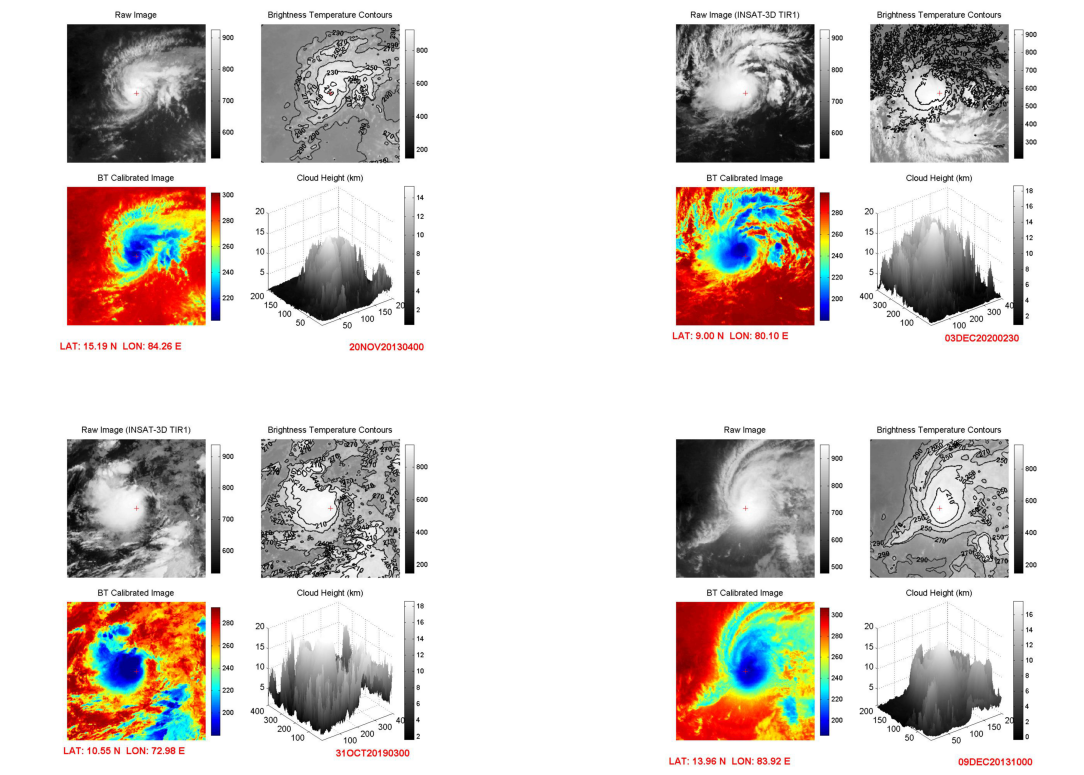

In [4]:
paths = glob.glob("../input/insat3d-infrared-raw-cyclone-images-20132021/insat3d_for_reference_ds/CYCLONE_DATASET/*.jpeg")
plt.figure(figsize=(20, 14))
for i in range(4):
    cur_img = mpimg.imread(paths[i]) 
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(cur_img.astype("uint8"))
    plt.axis("off")

In [5]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)

## **Loading the Train Dataset**

In [6]:
train_data = train_datagen.flow_from_dataframe(train,directory="../input/insat3d-infrared-raw-cyclone-images-20132021/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED",subset="training",
                                               x_col="img_name",y_col="label",target_size=(512, 512),batch_size=16,class_mode='raw')

val_data = train_datagen.flow_from_dataframe(train,directory="../input/insat3d-infrared-raw-cyclone-images-20132021/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED",subset="validation",
                                              x_col="img_name",y_col="label",target_size=(512, 512),batch_size=16,class_mode='raw')

Found 136 validated image filenames.
Found 0 validated image filenames.


In [7]:
for image_batch, labels_batch in train_data:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(16, 512, 512, 3)
(16,)


# **Main Model Build**

In [8]:
def build_model():
    base = tf.keras.applications.Xception(weights="imagenet", include_top=False, input_tensor=Input(shape=(512, 512, 3)))

    base.trainable = False

    flatten = base.output
    flatten = Flatten()(flatten)

    bboxHead = Dense(64, activation="relu")(flatten)
    bboxHead = Dense(32, activation="relu")(bboxHead)
    bboxHead = Dense(1, activation="linear")(bboxHead)

    model = Model(inputs=base.input, outputs=bboxHead)
    
    return model

In [9]:
# model = build_model()

## **Model Architecture**

In [10]:
#model.summary()

In [11]:
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# save_best = tf.keras.callbacks.ModelCheckpoint("Model.h5", monitor='loss',save_best_only=True, verbose=1)

## **Model Training**

In [12]:
# model.fit(train_data, epochs=50, callbacks=[save_best])

In [13]:
model = tf.keras.models.load_model('/kaggle/input/mymodel/tensorflow2/default/1/Model.h5')
model.evaluate(train_data)

9/9 [==============================] - 10s 246ms/step - loss: 2.4393 - root_mean_squared_error: 2.8255


[2.439321517944336, 2.8254847526550293]

# **Prediction**

In [14]:
pred = model.predict(train_data, verbose=1).round(2)

9/9 [==============================] - 2s 189ms/step


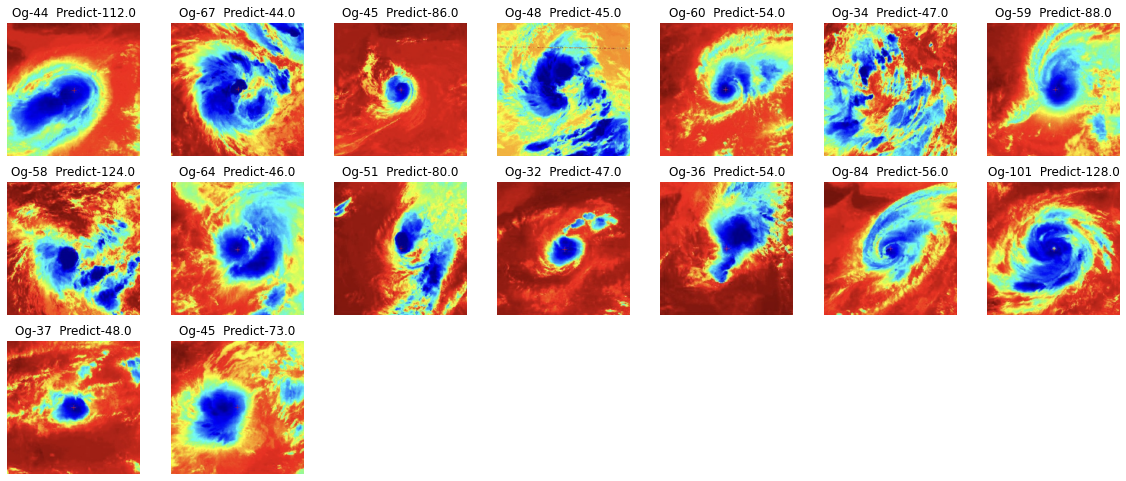

In [15]:
plt.figure(figsize=(20, 20))
for i in range(16):
    cur_img = train_data[0][0][i]
    ax = plt.subplot(7, 7, i + 1)
    plt.title("Og-"+str(train_data[0][1][i])+"  Predict-"+str(pred[i][0].round()))
    plt.imshow(cur_img)
    plt.axis("off")

In [16]:
pred.reshape(-1,)

array([111.7 ,  43.78,  85.76,  45.44,  54.02,  46.87,  87.63, 124.08,
        46.17,  79.98,  46.65,  53.63,  55.91, 128.01,  48.42,  72.51,
        60.81,  46.11,  51.08,  86.3 ,  50.98, 117.97,  40.89,  48.05,
        49.95,  51.11,  63.13,  46.8 ,  74.44,  83.27,  54.58,  80.03,
        48.61,  67.55,  42.91,  45.6 ,  60.32,  62.22,  88.37,  32.18,
        35.78,  65.53,  71.65,  70.66,  62.77,  30.08,  35.32,  43.73,
        34.04,  62.06,  47.96,  42.83,  68.82,  62.6 ,  71.12,  37.36,
        55.35,  57.97,  54.84,  49.28,  91.65,  51.14,  58.88, 119.26,
        60.11,  26.27, 103.83,  99.73,  83.14,  35.85,  84.72,  90.71,
       124.03,  56.91,  89.17,  49.02,  47.01,  41.57,  66.73,  37.35,
       104.33,  30.72,  48.97,  90.93,  46.1 ,  48.44,  63.41,  37.45,
        47.54,  51.29,  88.54,  55.62,  35.05,  88.58,  60.54,  37.96,
        71.72,  66.75,  63.61,  45.18,  53.22,  46.03,  62.28,  61.39,
        41.47,  47.11,  60.69,  76.82,  65.41,  54.46,  65.47,  37.55,
      